In [7]:
import pandas as pd
df = pd.read_csv("../dataset/superstore.csv", encoding="latin1")

In [9]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [11]:
df["profit_margin"] = df["Profit"] / df["Sales"]

In [13]:
df["discount_level"] = pd.cut(
    df["Discount"],
    bins=[-0.01, 0.1, 0.3, 1],
    labels=["Low", "Medium", "High"]
)

In [15]:
df[["Sales", "Profit", "Discount", "profit_margin", "discount_level"]].head()

,Sales,Profit,Discount,profit_margin,discount_level
0,261.9600,41.9136,0.00,0.1600,Low
1,731.9400,219.5820,0.00,0.3000,Low
2,14.6200,6.8714,0.00,0.4700,Low
3,957.5775,-383.0310,0.45,-0.4000,High
4,22.3680,2.5164,0.20,0.1125,Medium


In [16]:
profit_by_discount = (
    df
    .groupby("discount_level")[["Sales", "Profit"]]
    .sum()
    .reset_index()
)

profit_by_discount

C:\Users\user\AppData\Local\Temp\ipykernel_25504\4191094937.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("discount_level")[["Sales", "Profit"]]


,discount_level,Sales,Profit
0,Low,1.142278e+06,330016.7802
1,Medium,8.953795e+05,81387.0201
2,High,2.595435e+05,-125006.7786


In [17]:
margin_by_category = (
    df
    .groupby("Category")
    .apply(lambda x: x["Profit"].sum() / x["Sales"].sum())
    .reset_index(name="profit_margin")
)

margin_by_category

C:\Users\user\AppData\Local\Temp\ipykernel_25504\3511954962.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x["Profit"].sum() / x["Sales"].sum())


,Category,profit_margin
0,Furniture,0.024867
1,Office Supplies,0.170352
2,Technology,0.173957


In [18]:
loss_drivers = (
    df
    .groupby("Sub-Category")[["Sales", "Profit"]]
    .sum()
    .sort_values("Profit")
    .head(10)
)

loss_drivers


,Sales,Profit
Sub-Category,,
Tables,206965.5320,-17725.4811
Bookcases,114879.9963,-3472.5560
Supplies,46673.5380,-1189.0995
Fasteners,3024.2800,949.5182
Machines,189238.6310,3384.7569
Labels,12486.3120,5546.2540
Art,27118.7920,6527.7870
Envelopes,16476.4020,6964.1767
Furnishings,91705.1640,13059.1436


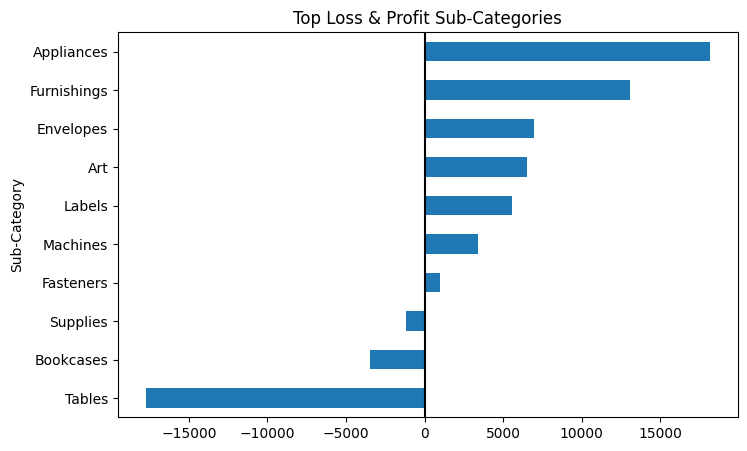

In [23]:
loss_drivers["Profit"].plot(
    kind="barh",
    title="Top Loss & Profit Sub-Categories",
    figsize=(8,5)
)
plt.axvline(0, color="black")
plt.show()
